In [50]:
import csv
import polars as pl #reading the dataset
import matplotlib.pyplot as plt #plotting library
from datetime import datetime #timestamp on comletion time
from mpl_toolkits.mplot3d import Axes3D


# Initialize an empty list to store the data
data_to_export = []

# Load the dataset
dataset = pl.read_excel('SET_D.xlsx')

#feature scaling (DISCOVERY : Feature scaling is necessary for learning rate = 0.01)
mean_Year = dataset['Year'].mean()
max_Year = dataset['Year'].max()
min_Year = dataset['Year'].min()# # Calculate the range
range_Year = max_Year - min_Year
dataset = dataset.with_columns((pl.col('Year') - mean_Year) / (range_Year))

#for data training
Year = dataset['Year'] #X
Male = dataset['Male'] #Y

#QUESTION b

#Compute the Cost Function 𝐽(𝜃) by initialize the thetas all zeros.  
theta0 = 0
theta1 = 0

#start code
#so our theta will only be 2, theta0 and theta1, because we only have 1 x value
#hypothesis function
def h(x, c, m):
    return m * x + c

no_example = len(Year) #number of training examples

#cost function
def compute_cost(t0, t1, training_example):
    sum_mse = 0
    for i in range(training_example):
        x = Year[i]
        y = Male[i]
        sum_mse += float((h(x, t0, t1) - y)**2)
    cost = float(sum_mse / float(2 * training_example))
    return cost


def gradient_descent(t0, t1, training_ex, learning_rate):
    derived_cost_func_t0 = 0
    derived_cost_func_t1 = 0

    for i in range(training_ex):
        x = Year[i]
        y = Male[i]

        #derivative of cost function for theta 0 (gradient)
        derived_cost_func_t0 += (h(x, t0, t1) - y)

        #derivative of cost function for theta 1 (gradient)
        derived_cost_func_t1 += ((h(x, t0, t1) - y) * x)

    t0 = t0 - (float(learning_rate/(training_ex)) * derived_cost_func_t0)
    t1 = t1 - (float(learning_rate/(training_ex)) * derived_cost_func_t1)

    return t0, t1

epochs = 50 #fixed number of iterations

def feature_scalling(alpha,theta0, theta1,epoch_counter):
    old_cost_function = compute_cost(theta0, theta1, no_example) + 1
    endtime = datetime.now()
    starttime = datetime.now()
    while True: 
        cost_function = compute_cost(theta0, theta1, no_example)
        print(f"Cost function: ", cost_function)
        print(f"Theta 0: {theta0}, Theta 1: {theta1}")
        print(f"Epoch: {epoch_counter}")
        #store the cost function, theta0 and theta1 in a list and export as file
        data_to_export.append([cost_function, theta0, theta1, epoch_counter])
        if (old_cost_function - cost_function) <= 0.001:
            endtime = datetime.now()
            break
        # if epoch_counter == epochs:
        #     endtime = datetime.now()
        #     break
        theta0, theta1 = gradient_descent(theta0, theta1, no_example, alpha)
        epoch_counter += 1   
        old_cost_function = cost_function
    
    print(f"Time taken to converge: {endtime - starttime}")

    #export the data to a csv file
    with open('output_'+ str(alpha) +'_withScaled.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["Cost Function", "Theta0", "Theta1", "Iteration"])  # Write the header
        writer.writerows(data_to_export)  # Write the data
    
    #close file
    f.close()
    return theta0, theta1, epoch_counter

Cost function:  2329.4217
Theta 0: 0, Theta 1: 0
Epoch: 1
Cost function:  2283.15800578027
Theta 0: 0.6818199999999999, Theta 1: 0.009102653061224514
Epoch: 2
Cost function:  2237.8148086199294
Theta 0: 1.3568218, Theta 1: 0.018197410964181607
Epoch: 3
Cost function:  2193.3737908883795
Theta 0: 2.025073582, Theta 1: 0.02728428055671266
Epoch: 4
Cost function:  2149.8169994754153
Theta 0: 2.68664284618, Theta 1: 0.03636326868071961
Epoch: 5
Cost function:  2107.1268385372755
Theta 0: 3.3415964177181996, Theta 1: 0.04543438217217001
Epoch: 6
Cost function:  2065.286062387036
Theta 0: 3.990000453541018, Theta 1: 0.05449762786110233
Epoch: 7
Cost function:  2024.2777685264953
Theta 0: 4.631920449005608, Theta 1: 0.06355301257163098
Epoch: 8
Cost function:  1984.085390816715
Theta 0: 5.2674212445155515, Theta 1: 0.0726005431219515
Epoch: 9
Cost function:  1944.6926927844743
Theta 0: 5.896567032070396, Theta 1: 0.0816402263243457
Epoch: 10
Cost function:  1906.0837610619212
Theta 0: 6.51942

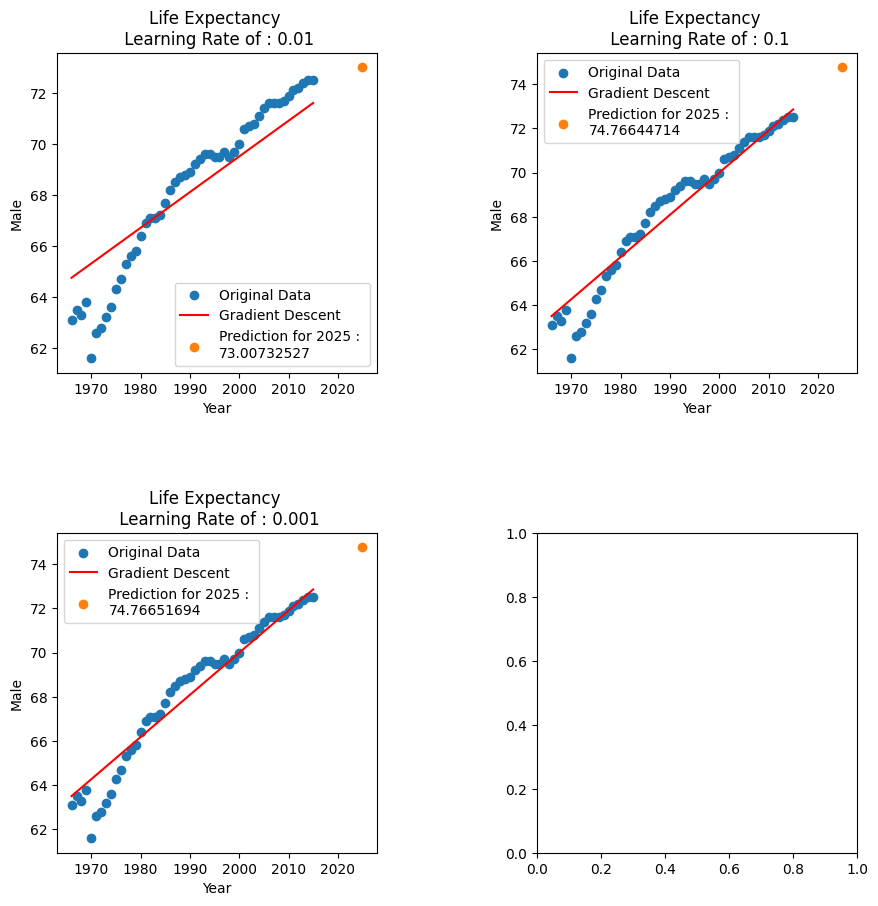

In [51]:
#Implement Gradient Descent from scratch in Python. (Using learning rate under alphas).
alphas = [0.01, 0.1, 0.001]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

df = pl.read_excel('SET_D.xlsx')
epoch_counter = 1

# Iterate over alphas and subplots
for i, alpha in enumerate(alphas):
    # Assuming theta0 and theta1 are defined and feature_scalling is a function you've defined
    theta0, theta1, epoch_counter = feature_scalling(alpha, theta0, theta1, epoch_counter)

    print('theta0 : ' + str(theta0) + '\ntheta1 : ' + str(theta1))

    line = theta0 + theta1 * Year

    # Determine the subplot to use based on the iteration index
    row = i // 2
    col = i % 2
    
    main_title = ('Life Expectancy \n Learning Rate of : ' + str(alpha))

    axs[row, col].set_title(label=main_title)

    axs[row, col].set_xlabel("Year")
    axs[row, col].set_ylabel("Male")
    # Calculate the original Male values using the original theta values
    original_Male = [theta0 + theta1 * year for year in Year]
    
    # Plot the original data and the gradient descent line using the original theta values
    axs[row, col].scatter(df['Year'], df['Male'], label='Original Data')
    axs[row, col].plot(df['Year'], line, color='red', label='Gradient Descent') 

    # Predict Male if Year = 2025
    Year_test = ((2025 - mean_Year) / (range_Year))
    predicted_male = theta0 + theta1 * Year_test
    print(predicted_male)

    #Plot the predicted Male
    axs[row, col].scatter(2025, predicted_male, label = ('Prediction for 2025 : \n' + str(round(predicted_male,8))) )
    axs[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

# Show the plots
plt.show()

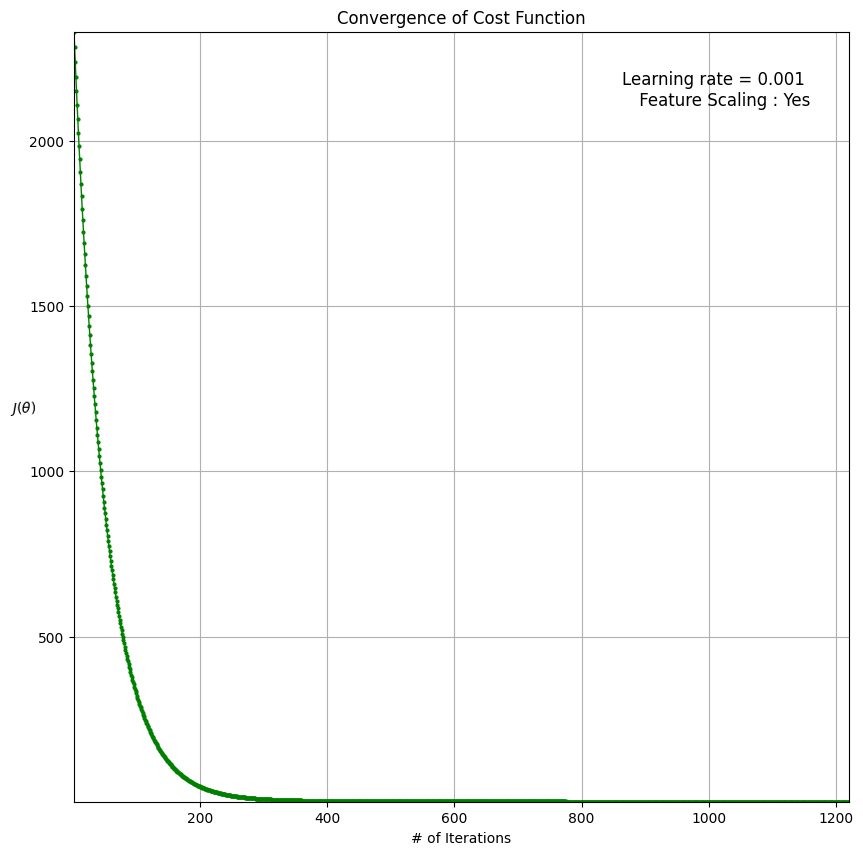

In [52]:
#the main convergence
import time

# Create a new figure for the second plot
fig2, ax2 = plt.subplots(figsize=(10, 10))

def plotcost(data):
    #loading dataset
    dataset = pl.read_csv(data)
    # Assuming 'Iteration' is the x-axis and 'Cost Function' is the y-axis
    ax2.plot(dataset['Iteration'], dataset['Cost Function'], 'g-o', label=r'${J{(\theta)}}$',markersize=2, linewidth=1) 
    ax2.grid(True)
    ax2.set_title("Convergence of Cost Function")
    ax2.set_xlabel('# of Iterations')
    ax2.set_ylabel(r'${J{(\theta)}}$', rotation=1) 

    # Upper right label for learning rate 
    ax2.text(0.95, 0.95, 'Learning rate = 0.001 \n Feature Scaling : Yes', fontsize=12, ha='right', va='top', transform=ax2.transAxes)
    
    # Correctly set x and y limits based on the dataset
    ax2.set_ylim([dataset['Cost Function'].min(), dataset['Cost Function'].max()])
    ax2.set_xlim([dataset['Iteration'].min(), dataset['Iteration'].max()])

plotcost('output_0.01_withScaled.csv')


# Show the plots
plt.show()

Minimum Cost: 1.915781632653061
Best Theta0: [70]
Best Theta1: [10]


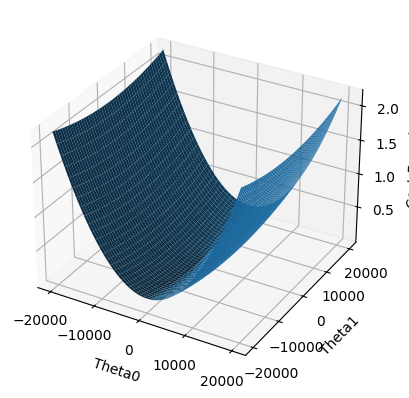

In [57]:
from mpl_toolkits import mplot3d
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# Corrected the import statement for matplotlib

dataset_1 = pl.read_csv('output_0.1_withScaled.csv')
dataset_2 = pl.read_excel('SET_D.xlsx')

# Corrected the syntax for updating dataset_2
dataset_2 = dataset_2.with_columns((pl.col('Year') - dataset_2['Year'].mean()) / (dataset_2['Year'].max() - dataset_2['Year'].min()))

Year = dataset_2["Year"] # Corrected the variable name and syntax
Male = dataset_2["Male"] # Corrected the variable name and syntax

# Create a grid of theta0 and theta1 values
theta0 = np.arange(-20000, 20000, 10)
theta1 = np.arange(-20000, 20000, 10)
x, y = np.meshgrid(theta0, theta1)

# Corrected the function name and syntax
def compute_cost(to, t1, len_Year):
    sum_mse = 0
    for i in range(len_Year):
        x = Year[i]
        y = Male[i] # Corrected the variable name and syntax
        sum_mse += (np.square((t1 * x + to) - y))
    cost = (sum_mse / float(2 * len_Year))
    return cost

Z = compute_cost(x, y, len(Year))

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, Z)

ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost Function')

# Find X, Y when Z is minimum
min_cost = np.min(Z)
index = np.where(Z == min_cost)
print("Minimum Cost:", min_cost)
best_theta0 = x[index]
best_theta1 = y[index]
print("Best Theta0:", best_theta0)
print("Best Theta1:", best_theta1)

# Show the plots
plt.show()